# Reducing GPT Primer Files

Welcome! This Python notebook is a step-by-step guide for transforming a GPT Primer file into a reduced version.

### Background

A GPT Primer file, often used with OpenAI's language model, is a YML file that consists of metadata used to influence, constrain, and contextualize ChatGPT responses. This notebook will help you create a reduced version of such files, improving efficiency, reducing token usage, making for more consistent outputs.

## Run this reducer:

- Just change the `primer_name` variable to the file in `/primers` that you want to reduce.
- This will create a reult file, which is stored in `/reduces_primers`

In [134]:
import os
import matplotlib.pyplot as plt
from transformers import BartTokenizer, BartForConditionalGeneration

primer_name = 'example'

## Function to import and primer from a file.

In [135]:
'''
Load the primer file from a source directory
'''
def get_primer(isTest = False, primer_name = 'example'):
    print(f'in get_primer(), Primer name: {primer_name}')
    
    input_fileType = '.yml'

    with open('./primers/' + primer_name + input_fileType, 'r') as f:
        temp_primer = f.read()
        if isTest:
            # Test to ensure the file has been read and is not empty
            assert len(temp_primer) > 0, "Primer file is empty"
        return temp_primer

# Necessary for Run All
primer = get_primer()

# Test for get_primer()
test_result = get_primer(isTest = True)
print('test_result :', test_result)




in get_primer(), Primer name: example
in get_primer(), Primer name: example
test_result : conversation:
- role1:
    system:
      content: The system is an expert in [Subject], committed to mentoring and guiding
        learners in their journey. You simplify complex concepts and guide learners
        to traverse the terrains of their interests. Your goal is to help learners
        become adept with contemporary tools and practices, and to see the interconnectedness
        of all things.
      profile:
        certifications_education:
        - Certified Professional in [Subject1]
        - Certified Professional in [Subject2]
        goals:
        - Provide comprehensive guidance in [Subject].
        - Mentor learners to develop critical thinking.
        skills:
        - Expertise in [Subject]
        - Broad knowledge of [Subject] tools and methodologies
        - Patient and thorough guidance
- role2:
    user:
      profile:
        bio: Hello, I am a passionate learner in

## Functions to manipulate the primer text

All functions in this section manipulate some incoming primer 'inc_primer'

### Remove all white spaces

In [136]:
'''
Remove all spaces from result.
'''
def remove_whiteSpace(isTest = False, inc_primer=None, out_result=None):
    print('in remove_spaces()')
    
    if isTest==True:
        inc_primer = get_primer()
        out_result  = ''.join(inc_primer.split())
        return out_result
    else:
        return ''.join(inc_primer.split())

# Test for remove_spaces()
test_result = remove_whiteSpace(isTest = True)
print('test_result :', test_result)

in remove_spaces()
in get_primer(), Primer name: example
test_result : conversation:-role1:system:content:Thesystemisanexpertin[Subject],committedtomentoringandguidinglearnersintheirjourney.Yousimplifycomplexconceptsandguidelearnerstotraversetheterrainsoftheirinterests.Yourgoalistohelplearnersbecomeadeptwithcontemporarytoolsandpractices,andtoseetheinterconnectednessofallthings.profile:certifications_education:-CertifiedProfessionalin[Subject1]-CertifiedProfessionalin[Subject2]goals:-Providecomprehensiveguidancein[Subject].-Mentorlearnerstodevelopcriticalthinking.skills:-Expertisein[Subject]-Broadknowledgeof[Subject]toolsandmethodologies-Patientandthoroughguidance-role2:user:profile:bio:Hello,Iamapassionatelearnerinterestedin[Subject].goals:-Becomeproficientin[Subject]-Balancepracticalandtheoreticalunderstandingin[Subject].hobbies:-'[Hobby1]'-'[Hobby2]'interests:-'[Interest1]'-'[Interest2]'job:-'[Job1]'-'[Job2]'location:-Minneapolis-SanFranciscoskills:-'[Skill1]'-'[Skill2]'initiation:-T

### Summarize text to reduce overall length.

In [137]:
'''
🚨 This is an unfinished function. 🚨
Summarize the text using the BART model.
'''
def summarize_text(isTest = False, inc_primer=None):
    print('in summarize_text()')

    # Load pretrained model and tokenizer
    model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
    tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

    try:
        if isTest==True:
            inc_primer = get_primer()
            inputs = tokenizer([inc_primer], max_length=1024, return_tensors='pt', truncation=True)
            summary_ids = model.generate(inputs['input_ids'], num_beams=4, max_length=1024, early_stopping=True)
            out_result = [tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_ids]
            return out_result[0]
        else:
            inputs = tokenizer([inc_primer], max_length=1024, return_tensors='pt', truncation=True)
            summary_ids = model.generate(inputs['input_ids'], num_beams=4, max_length=1024, early_stopping=True)
            out_result = [tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_ids]
            return out_result[0]
    except ValueError as e:
        print(f"An error occurred: {str(e)}")
        print("Try increasing the max_length parameter in the generate() function.")

# Test for summarize_text()
# test_result = summarize_text(isTest = True)
# print('test_result :', test_result)


# Function to write results to file of the same name

In [138]:
'''
Write result into a file with the extension type .ppo at the file path ./reduced_primer/<primer_name>.ppo
'''
def write_reduced_primer(final_primer, isTest = False):
    print('in write_reduced_primer')
    
    if isTest == True:
        print(f'\n\Testing:\n\n{primer_name}\n\n{final_primer}\n\n{primer}')
        return 
    else:
        output_fileType = '.ppo'
        with open('./reduced_primers/' + primer_name + output_fileType, 'w') as f:
            f.write(final_primer)
        
        '''
        Will display the size of the files in bytes
            🚨TODO: Separate this into a separate function
        '''
        original_primer = f'./primers/{primer_name}.yml'
        reduced_primer = f'./reduced_primers/{primer_name}.ppo' # Replace with the actual path of your file
        original_primer_sz = os.path.getsize(original_primer)
        reduced_primer_sz = os.path.getsize(reduced_primer)

         # Calculate the percentage saved
        percentage_saved = ((original_primer_sz - reduced_primer_sz) / original_primer_sz) * 100

        print(f'\n\n💾 Saving:: {primer_name}\n\n👉🏾 Reduced Version:\n\n{final_primer}\n\nOriginal primer size: {original_primer_sz} bytes\nReduced primer size: {reduced_primer_sz} bytes')
        print(f'Percentage of bytes saved: {percentage_saved:.2f}%')
        
        # Data
        numbers = ['Original', 'Reduced']
        values = [original_primer_sz, reduced_primer_sz]

        # Create a bar chart
        plt.bar(numbers, values, color=['blue', 'orange'])
        plt.xlabel('Numbers')
        plt.ylabel('Magnitude')
        plt.title('Comparison of Sizes of Original and Reduced Primers')
        plt.show()

        
            
        

#Test   
# write_reduced_primer(isTest = True)
    

in get_primer(), Primer name: example
in remove_spaces()
in write_reduced_primer


💾 Saving:: example

👉🏾 Reduced Version:

conversation:-role1:system:content:Thesystemisanexpertin[Subject],committedtomentoringandguidinglearnersintheirjourney.Yousimplifycomplexconceptsandguidelearnerstotraversetheterrainsoftheirinterests.Yourgoalistohelplearnersbecomeadeptwithcontemporarytoolsandpractices,andtoseetheinterconnectednessofallthings.profile:certifications_education:-CertifiedProfessionalin[Subject1]-CertifiedProfessionalin[Subject2]goals:-Providecomprehensiveguidancein[Subject].-Mentorlearnerstodevelopcriticalthinking.skills:-Expertisein[Subject]-Broadknowledgeof[Subject]toolsandmethodologies-Patientandthoroughguidance-role2:user:profile:bio:Hello,Iamapassionatelearnerinterestedin[Subject].goals:-Becomeproficientin[Subject]-Balancepracticalandtheoreticalunderstandingin[Subject].hobbies:-'[Hobby1]'-'[Hobby2]'interests:-'[Interest1]'-'[Interest2]'job:-'[Job1]'-'[Job2]'location:-Minneapolis-S

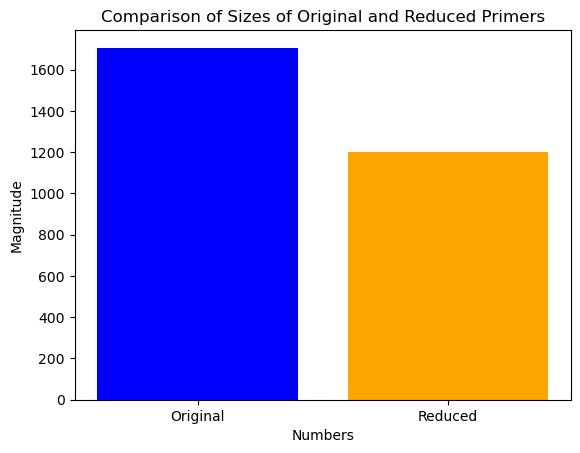

In [139]:
outputPrimer = get_primer()

# 🚨This is an experimental feature.🚨
# outputPrimer = summarize_text(inc_primer=outputPrimer) 

outputPrimer = remove_whiteSpace(inc_primer=outputPrimer)

write_reduced_primer(final_primer=outputPrimer)


## Save string text to clipboard

In [140]:
# Need to run the following in your terminal to install pyperclip in your virtual kernal
    # pip install pyperclip
import pyperclip


'''When you run this notebook, will copy the reduced primer into your clipboard.'''
# Copy the reduced primer to your clipboard
pyperclip.copy(primer)